In [ ]:
## Dingyi Kang
## A20308046
## Assignment3 - problem 1

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# download and load the data into np array
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
# normalize the pixel data (to make the value between 0 and 1)
train_x = train_images / 255.0
test_x = test_images / 255.0
train_x.shape

In [ ]:
def buildCNNModel(batchSize, optimizerStr, learningRate, layersArr):
  # build a sequential model containing generallt three layers
  cnn_model = tf.keras.models.Sequential()
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[0], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[1], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[2], (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[3], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[4], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[5], (3, 3), strides=(2, 2), padding='same',  activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[6], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[7], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[8], (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  cnn_model.add(tf.keras.layers.Conv2D(layersArr[9], (3, 3), padding='same', activation='relu'))

  #flatten the output of final layers to feed the features extracted from above inputs to the neural networks model
  cnn_model.add(tf.keras.layers.Flatten())
  # make a neural network with a hidden layer of 256 neurons with activation of ReLu
  cnn_model.add(tf.keras.layers.Dense(256))
  cnn_model.add(tf.keras.layers.Activation('relu'))
  # make the a output layer of 10 neurons with activation of softmax
  cnn_model.add(tf.keras.layers.Dense(10))
  cnn_model.add(tf.keras.layers.Activation('softmax'))

  #compile the model with certain configuration of loss function, optimizer and its learning rate, and result metrics
  if optimizerStr == 'Adam':
    optimizer = keras.optimizers.Adam(learning_rate=learningRate)
  elif optimizerStr == 'SGD':
    optimizer = keras.optimizers.SGD(learning_rate=learningRate)
  elif optimizerStr == 'RMSProp':
    optimizer = keras.optimizers.RMSprop(learning_rate=learningRate)
  cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
  cnn_model.build(input_shape=(1,28,28,1))
  cnn_model.summary()

  # Train the model.
  cnn_model.fit(
      x_train,
      train_labels, 
      batch_size=batchSize,
      epochs=10)
  # test the model performance
  score = cnn_model.evaluate(x_test, test_labels)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # return the accuracy score
  return score[1]

In [ ]:
#add an additional dimension to represent the single-channel
x_train = train_x.reshape(-1, 28, 28, 1) 
x_test = test_x.reshape(-1, 28, 28, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (1, 28, 28, 10)           100       
                                                                 
 conv2d_8 (Conv2D)           (1, 28, 28, 20)           1820      
                                                                 
 conv2d_9 (Conv2D)           (1, 14, 14, 30)           5430      
                                                                 
 max_pooling2d_2 (MaxPooling  (1, 7, 7, 30)            0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (1, 7, 7, 40)             10840     
                                                                 
 conv2d_11 (Conv2D)          (1, 7, 7, 50)             18050     
                                                      

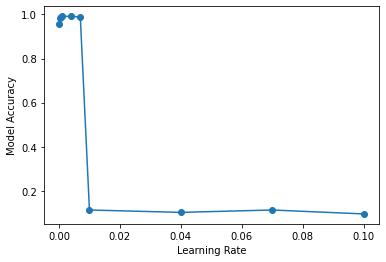

In [ ]:
# 1. for regular CNN where the number of filters in each layer increases as the depth of the network grows

# 1.1 we can first compare the influence of learning rate on the model performance

#below is the learning rate we try at the first
learningRatesArr = [0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i], layersArr=[10,20,30,40,50,60,70,80,90,100])
  accuracyArr.append(a)

plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Learning Rates on Predictin Accuracy")
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)


# Report: in experiment above, we tried learnign rates of 0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1 for regular CNN model with batch size of 512 and optimizer of Adam.
# From the result graph we can see, the model did well when the learning rate is less then 0.01 So, next we futher explore this area

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_108 (Conv2D)         (1, 28, 28, 20)           1820      
                                                                 
 conv2d_109 (Conv2D)         (1, 14, 14, 30)           5430      
                                                                 
 max_pooling2d_32 (MaxPoolin  (1, 7, 7, 30)            0         
 g2D)                                                            
                                                                 
 conv2d_110 (Conv2D)         (1, 7, 7, 40)             10840     
                                                                 
 conv2d_111 (Conv2D)         (1, 7, 7, 50)             18050     
                                                     

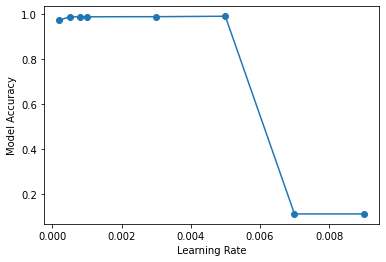

In [ ]:
#below is the learning rate we try at the second attempt
learningRatesArr = [0.0002, 0.0005, 0.0008, 0.001, 0.003, 0.005, 0.007, 0.009]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i], layersArr=[10,20,30,40,50,60,70,80,90,100])
  accuracyArr.append(a)
  
plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Learning Rates on Predictin Accuracy")
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# Report: in this experiment, we tried learnign rates of 0.0002, 0.0005, 0.0008, 0.001, 0.003, 0.005, 0.007, 0.009 for regular CNN model with batch size of 512 and optimizer of Adam.
# From the result graph we can see, the model did the best with a learning rate of 0.003 with an accuray of 0.98890

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_187 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_188 (Conv2D)         (1, 28, 28, 20)           1820      
                                                                 
 conv2d_189 (Conv2D)         (1, 14, 14, 30)           5430      
                                                                 
 max_pooling2d_56 (MaxPoolin  (1, 7, 7, 30)            0         
 g2D)                                                            
                                                                 
 conv2d_190 (Conv2D)         (1, 7, 7, 40)             10840     
                                                                 
 conv2d_191 (Conv2D)         (1, 7, 7, 50)             18050     
                                                     

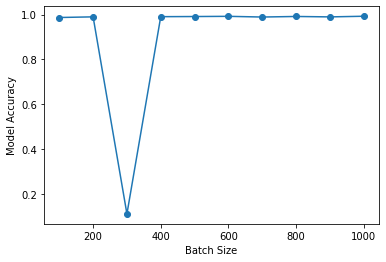

In [ ]:
# 1.2 we can compare the influence of batch size on the model performance
#below is the batch sizes we try
batchSizesArr = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accuracyArr = []
for i in range(len(batchSizesArr)):
  a = buildCNNModel(batchSize=batchSizesArr[i], optimizerStr='Adam', learningRate=0.003, layersArr=[10,20,30,40,50,60,70,80,90,100])
  accuracyArr.append(a)
  
plt.xlabel("Batch Size")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Batch Sizes on Predictin Accuracy")
plt.scatter(batchSizesArr, accuracyArr)
plt.plot(batchSizesArr, accuracyArr)

# Report: in this experiment, we tried batch sizes of 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 for regular CNN model with learning rate of 0.003 and optimizer of Adam. From the result graph we can see, the model did the best with a batch size of 600 with an accuray of 0.99190

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_347 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_348 (Conv2D)         (1, 28, 28, 20)           1820      
                                                                 
 conv2d_349 (Conv2D)         (1, 14, 14, 30)           5430      
                                                                 
 max_pooling2d_104 (MaxPooli  (1, 7, 7, 30)            0         
 ng2D)                                                           
                                                                 
 conv2d_350 (Conv2D)         (1, 7, 7, 40)             10840     
                                                                 
 conv2d_351 (Conv2D)         (1, 7, 7, 50)             18050     
                                                     

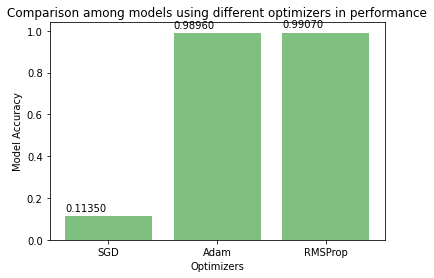

In [ ]:
# 1.3 we can compare the influence of different optimizers on the model performance
#below is three optimizers we try
optimizers = ['SGD', 'Adam', 'RMSProp']
accuracyArr = []
for i in range(len(optimizers)):
  a = buildCNNModel(batchSize=600, optimizerStr=optimizers[i], learningRate=0.003, layersArr=[10,20,30,40,50,60,70,80,90,100])
  accuracyArr.append(a)
  
x = list(optimizers)
bars = plt.bar(x, accuracyArr, width=0.8, color='g', alpha=0.5, align='center')
plt.xlabel("Optimizers")
plt.ylabel('Model Accuracy')
plt.title("Comparison among models using different optimizers in performance")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.025, "{:.5f}".format(yval))

# Report: in this experiment, we tried three different optimizers, i.e., Adam, RMSProp, and SGD, for regular CNN model with learning rate of 0.003 and batch size of 600.

# From bar graph above we can see both Adam and RMSProp give model much better performance than SGD, and RMSProp is even slightly better than Adam with an accuracy of 0.99070.

# In summary, we can tell the regular CNN model with learnign rate of 0.003, batch size of 600, and optimizer of RMSProp has the best performance with a predication arruracy of 0.99070

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_377 (Conv2D)         (1, 28, 28, 100)          1000      
                                                                 
 conv2d_378 (Conv2D)         (1, 28, 28, 90)           81090     
                                                                 
 conv2d_379 (Conv2D)         (1, 14, 14, 80)           64880     
                                                                 
 max_pooling2d_113 (MaxPooli  (1, 7, 7, 80)            0         
 ng2D)                                                           
                                                                 
 conv2d_380 (Conv2D)         (1, 7, 7, 70)             50470     
                                                                 
 conv2d_381 (Conv2D)         (1, 7, 7, 60)             37860     
                                                     

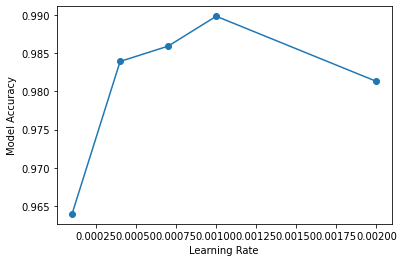

In [ ]:
# 2. for inverted CNN where the number of filters in each layer decreases as the depth of the network grows

# 2.1 we can first compare the influence of learning rate on the model performance

#below is the learning rate we try at the first
learningRatesArr = [0.0001, 0.0004, 0.0007, 0.001, 0.002]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i], layersArr=[100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
  accuracyArr.append(a)

plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Learning Rates on Predictin Accuracy")
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# Report: in experiment above, we tried learnign rates of 0.0001, 0.0004, 0.0007, 0.001, 0.002 for inverted CNN model with batch size of 512 and optimizer of Adam. From the result graph we can see, the model did the best with learning rate of 0.001 with an accuray of 0.98980. So, next we futher explore this area.

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_467 (Conv2D)         (1, 28, 28, 100)          1000      
                                                                 
 conv2d_468 (Conv2D)         (1, 28, 28, 90)           81090     
                                                                 
 conv2d_469 (Conv2D)         (1, 14, 14, 80)           64880     
                                                                 
 max_pooling2d_140 (MaxPooli  (1, 7, 7, 80)            0         
 ng2D)                                                           
                                                                 
 conv2d_470 (Conv2D)         (1, 7, 7, 70)             50470     
                                                                 
 conv2d_471 (Conv2D)         (1, 7, 7, 60)             37860     
                                                     

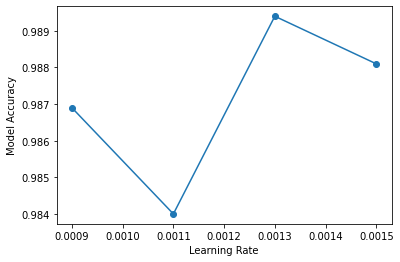

In [ ]:
#below is the learning rate we try at the second attempt
learningRatesArr = [0.0009, 0.0011, 0.0013, 0.0015]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i], layersArr=[100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
  accuracyArr.append(a)
  
plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Learning Rates on Predictin Accuracy")
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# Report: in experiment above, we tried learnign rates of 0.0009, 0.0011, 0.0013, 0.0015 for inverted CNN model with batch size of 512 and optimizer of Adam. From the result graph we can see, the model did the best with learning rate of 0.0013 with an accuray of 0.98940.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 28, 28, 100)          1000      
                                                                 
 conv2d_1 (Conv2D)           (1, 28, 28, 90)           81090     
                                                                 
 conv2d_2 (Conv2D)           (1, 14, 14, 80)           64880     
                                                                 
 max_pooling2d (MaxPooling2D  (1, 7, 7, 80)            0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (1, 7, 7, 70)             50470     
                                                                 
 conv2d_4 (Conv2D)           (1, 7, 7, 60)             37860     
                                                        

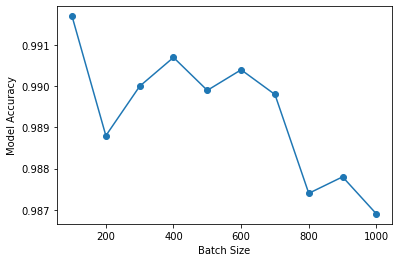

In [ ]:
# 2.2 we can compare the influence of batch size on the model performance
# below is the batch sizes we try
batchSizesArr = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accuracyArr = []
for i in range(len(batchSizesArr)):
  a = buildCNNModel(batchSize=batchSizesArr[i], optimizerStr='Adam', learningRate=0.0013, layersArr=[100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
  accuracyArr.append(a)
  
plt.xlabel("Batch Size")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Batch Sizes on Predictin Accuracy")
plt.scatter(batchSizesArr, accuracyArr)
plt.plot(batchSizesArr, accuracyArr)

# In this experiment, we tried batch sizes of 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 for inverted CNN model with learning rate of 0.0013 and optimizer of Adam. From the result graph we can see, the model with a batch size of 100 did the best with an accuray of 0.99170

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (1, 28, 28, 100)          1000      
                                                                 
 conv2d_101 (Conv2D)         (1, 28, 28, 90)           81090     
                                                                 
 conv2d_102 (Conv2D)         (1, 14, 14, 80)           64880     
                                                                 
 max_pooling2d_30 (MaxPoolin  (1, 7, 7, 80)            0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (1, 7, 7, 70)             50470     
                                                                 
 conv2d_104 (Conv2D)         (1, 7, 7, 60)             37860     
                                                     

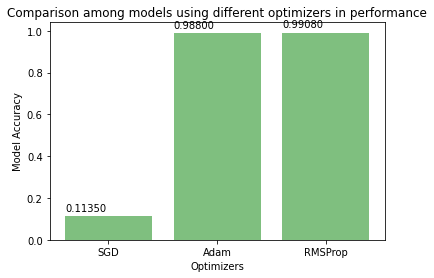

In [ ]:
# 2.3 we can compare the influence of different optimizers on the model performance
# below is three optimizers we try
optimizers = ['SGD', 'Adam', 'RMSProp']
accuracyArr = []
for i in range(len(optimizers)):
  a = buildCNNModel(batchSize=100, optimizerStr=optimizers[i], learningRate=0.0013, layersArr=[100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
  accuracyArr.append(a)
  
x = list(optimizers)
bars = plt.bar(x, accuracyArr, width=0.8, color='g', alpha=0.5, align='center')
plt.xlabel("Optimizers")
plt.ylabel('Model Accuracy')
plt.title("Comparison among models using different optimizers in performance")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.025, "{:.5f}".format(yval))

# In this experiment, we tried three different optimizers, i.e., Adam, RMSProp, and SGD, for inverted CNN model with learning rate of 0.0013 and batch size of 100.

# From bar graph above we can see both Adam and RMSProp give model much better performance than SGD, and RMSProp is slightly better than Adam with an accuracy of 0.99080.

# In summary, we can tell the inverted CNN model with learnign rate of 0.0013, batch size of 100, and optimizer of RMSProp has the best performance with a predication arruracy of 0.99080

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_131 (Conv2D)         (1, 28, 28, 30)           2730      
                                                                 
 conv2d_132 (Conv2D)         (1, 14, 14, 50)           13550     
                                                                 
 max_pooling2d_39 (MaxPoolin  (1, 7, 7, 50)            0         
 g2D)                                                            
                                                                 
 conv2d_133 (Conv2D)         (1, 7, 7, 70)             31570     
                                                                 
 conv2d_134 (Conv2D)         (1, 7, 7, 90)             56790     
                                                     

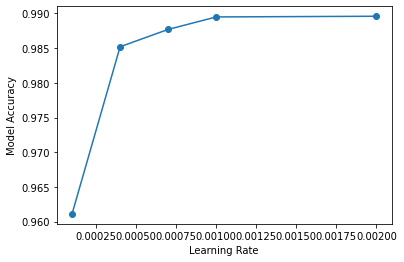

In [ ]:
# 3. for hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.

# 3.1 we can first compare the influence of learning rate on the model performance

# below is the learning rate we try at the first
learningRatesArr = [0.0001, 0.0004, 0.0007, 0.001, 0.002]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i], layersArr=[10,30,50,70,90,100,80,60,40,20])
  accuracyArr.append(a)

plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Learning Rates on Predictin Accuracy")
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# Report: in experiment above, we tried learnign rates of 0.0001, 0.0004, 0.0007, 0.001, 0.002 for hour-glass shape CNN model with batch size of 512 and optimizer of Adam. From the result graph we can see, the model did the best with learning rate of 0.002 with an accuray of 0.98960. So, next we futher explore this area.

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_180 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_181 (Conv2D)         (1, 28, 28, 30)           2730      
                                                                 
 conv2d_182 (Conv2D)         (1, 14, 14, 50)           13550     
                                                                 
 max_pooling2d_54 (MaxPoolin  (1, 7, 7, 50)            0         
 g2D)                                                            
                                                                 
 conv2d_183 (Conv2D)         (1, 7, 7, 70)             31570     
                                                                 
 conv2d_184 (Conv2D)         (1, 7, 7, 90)             56790     
                                                     

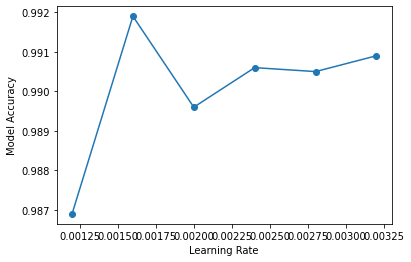

In [ ]:
#below is the learning rate we try at the second attempt
learningRatesArr = [0.0012, 0.0016, 0.002, 0.0024, 0.0028, 0.0032]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i], layersArr=[10,30,50,70,90,100,80,60,40,20])
  accuracyArr.append(a)
  
plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Learning Rates on Predictin Accuracy")
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# Report: in experiment above, we tried learnign rates of 0.0012, 0.0016, 0.002, 0.0024, 0.0028, 0.0032 for hour-glass shape CNN model with batch size of 512 and optimizer of Adam. From the result graph we can see, the model did the best with learning rate of 0.0016 with an accuray of 0.99190. So, next we futher explore this area.

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_240 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_241 (Conv2D)         (1, 28, 28, 30)           2730      
                                                                 
 conv2d_242 (Conv2D)         (1, 14, 14, 50)           13550     
                                                                 
 max_pooling2d_72 (MaxPoolin  (1, 7, 7, 50)            0         
 g2D)                                                            
                                                                 
 conv2d_243 (Conv2D)         (1, 7, 7, 70)             31570     
                                                                 
 conv2d_244 (Conv2D)         (1, 7, 7, 90)             56790     
                                                     

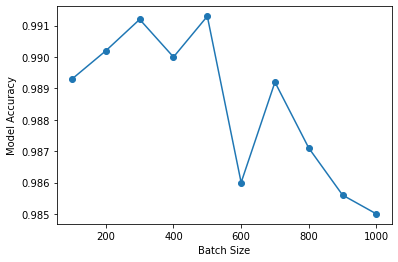

In [ ]:
# 3.2 we can compare the influence of batch size on the model performance
# below is the batch sizes we try
batchSizesArr = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accuracyArr = []
for i in range(len(batchSizesArr)):
  a = buildCNNModel(batchSize=batchSizesArr[i], optimizerStr='Adam', learningRate=0.0016, layersArr=[10,30,50,70,90,100,80,60,40,20])
  accuracyArr.append(a)
  
plt.xlabel("Batch Size")
plt.ylabel('Model Accuracy')
plt.title("Effect of Different Batch Sizes on Predictin Accuracy")
plt.scatter(batchSizesArr, accuracyArr)
plt.plot(batchSizesArr, accuracyArr)

# In this experiment, we tried batch sizes of 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 for hour-glass shape CNN model with learning rate of 0.0016 and optimizer of Adam. From the result graph we can see, the model with a batch size of 500 did the best with an accuray of 0.99130

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_340 (Conv2D)         (1, 28, 28, 10)           100       
                                                                 
 conv2d_341 (Conv2D)         (1, 28, 28, 30)           2730      
                                                                 
 conv2d_342 (Conv2D)         (1, 14, 14, 50)           13550     
                                                                 
 max_pooling2d_102 (MaxPooli  (1, 7, 7, 50)            0         
 ng2D)                                                           
                                                                 
 conv2d_343 (Conv2D)         (1, 7, 7, 70)             31570     
                                                                 
 conv2d_344 (Conv2D)         (1, 7, 7, 90)             56790     
                                                     

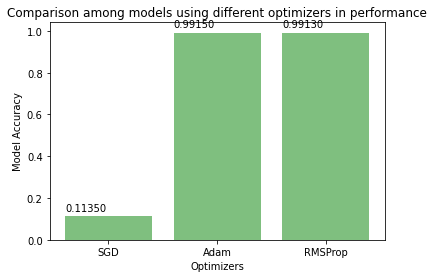

In [ ]:
#1.3 we can compare the influence of different optimizers on the model performance
#below is three optimizers we try
optimizers = ['SGD', 'Adam', 'RMSProp']
accuracyArr = []
for i in range(len(optimizers)):
  a = buildCNNModel(batchSize=500, optimizerStr=optimizers[i], learningRate=0.0016, layersArr=[10,30,50,70,90,100,80,60,40,20])
  accuracyArr.append(a)
  
x = list(optimizers)
bars = plt.bar(x, accuracyArr, width=0.8, color='g', alpha=0.5, align='center')
plt.xlabel("Optimizers")
plt.ylabel('Model Accuracy')
plt.title("Comparison among models using different optimizers in performance")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.025, "{:.5f}".format(yval))

# In this experiment, we tried three different optimizers, i.e., Adam, RMSProp, and SGD, for hour-glass shaped CNN model with learning rate of 0.0016 and batch size of 500.

# From bar graph above we can see both Adam and RMSProp give model much better performance than SGD, and Adam is slightly better than Adam with an accuracy of 0.99150.

# In summary, we can tell the hour-glass shaped CNN model with learnign rate of 0.0016, batch size of 500, and optimizer of Adam has the best performance with a predication arruracy of 0.99150